In [52]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import scale
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# Loading Data

In [2]:
all_tweets = pd.read_json("random_tweets.json", lines=True)

In [4]:
all_tweets.head()

,created_at,id,id_str,text,truncated,entities,metadata,source,in_reply_to_status_id,in_reply_to_status_id_str,...,favorite_count,favorited,retweeted,lang,possibly_sensitive,quoted_status_id,quoted_status_id_str,extended_entities,quoted_status,withheld_in_countries
0,2018-07-31 13:34:40+00:00,1024287229525598210,1024287229525598208,RT @KWWLStormTrack7: We are more than a month ...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,NaN,...,0,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-07-31 13:34:40+00:00,1024287229512953856,1024287229512953856,@hail_ee23 Thanks love its just the feeling of...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",1.024128e+18,1.024128e+18,...,0,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-07-31 13:34:40+00:00,1024287229504569344,1024287229504569344,RT @TransMediaWatch: Pink News has more on the...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,0,False,False,en,0.0,NaN,NaN,NaN,NaN,NaN
3,2018-07-31 13:34:40+00:00,1024287229496029190,1024287229496029184,RT @realDonaldTrump: One of the reasons we nee...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,NaN,...,0,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-07-31 13:34:40+00:00,1024287229492031490,1024287229492031488,RT @First5App: This hearing of His Word doesn’...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,0,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
len(all_tweets)

11099

In [7]:
all_tweets.loc[0].text

'RT @KWWLStormTrack7: We are more than a month into summer but the days are getting shorter. The sunrise is about 25 minutes later on July 3…'

# Creating labels Column

### Calculating Mean of retweets

In [8]:
median_retweets = all_tweets.retweet_count.median()

In [10]:
median_retweets

13.0

### Creating New column

In [11]:
all_tweets['is_viral'] = np.where(all_tweets['retweet_count'] > median_retweets, 1, 0)

# Features

In [12]:
all_tweets['tweet_length'] = all_tweets.apply(lambda tweet : len(tweet['text']), axis=1)

In [16]:
all_tweets['tweet_length']

0        140
1         77
2        140
3        140
4        140
        ... 
11094    140
11095     75
11096    140
11097    140
11098     75
Name: tweet_length, Length: 11099, dtype: int64

In [13]:
all_tweets['followers_count'] = all_tweets.apply(lambda tweet : tweet['user']['followers_count'], axis=1)

In [17]:
all_tweets['followers_count']

0         215
1         199
2         196
3        3313
4         125
         ... 
11094     509
11095     462
11096     135
11097      59
11098    1563
Name: followers_count, Length: 11099, dtype: int64

In [19]:
all_tweets['friends_count'] = all_tweets.apply(lambda tweet : tweet['user']['friends_count'], axis=1)

In [20]:
all_tweets['friends_count']

0         335
1         203
2         558
3        2272
4         273
         ... 
11094    1323
11095    1033
11096      90
11097     320
11098    1697
Name: friends_count, Length: 11099, dtype: int64

In [15]:
all_tweets['hastag_count'] = all_tweets.apply(lambda tweet : tweet['text'].count('#'), axis=1)

In [22]:
all_tweets['hastag_count']

0        0
1        0
2        0
3        0
4        0
        ..
11094    0
11095    0
11096    0
11097    0
11098    0
Name: hastag_count, Length: 11099, dtype: int64

In [23]:
labels = all_tweets['is_viral']

In [24]:
labels

0        0
1        0
2        0
3        1
4        0
        ..
11094    1
11095    1
11096    0
11097    0
11098    0
Name: is_viral, Length: 11099, dtype: int64

In [25]:
data = all_tweets[['tweet_length', 'followers_count', 'friends_count', 'hastag_count']]

In [26]:
data

,tweet_length,followers_count,friends_count,hastag_count
0,140,215,335,0
1,77,199,203,0
2,140,196,558,0
3,140,3313,2272,0
4,140,125,273,0
...,...,...,...,...
11094,140,509,1323,0
11095,75,462,1033,0
11096,140,135,90,0
11097,140,59,320,0


# Normalizing The Data

In [27]:
scaled_data = scale(data, axis=0)

In [28]:
scaled_data

array([[ 0.6164054 , -0.02878298, -0.14483305, -0.32045057],
       [-1.64577622, -0.02886246, -0.16209787, -0.32045057],
       [ 0.6164054 , -0.02887736, -0.11566596, -0.32045057],
       ...,
       [ 0.6164054 , -0.02918038, -0.1768776 , -0.32045057],
       [ 0.6164054 , -0.02955792, -0.14679496, -0.32045057],
       [-1.71759151, -0.02208668,  0.0333085 , -0.32045057]])

# Creating the Training Set and Validation Set

In [33]:
def split_vals(a,n):
    return a[:n].copy(), a[n:].copy()

n_valid = 2000 
n_trn = len(scaled_data)-n_valid
raw_train, raw_valid = split_vals(all_tweets, n_trn)
X_train, X_valid = split_vals(scaled_data, n_trn)
y_train, y_valid = split_vals(labels, n_trn)

X_train.shape, y_train.shape, X_valid.shape

((9099, 4), (9099,), (2000, 4))

# Using the Classifier

In [34]:
classifier = KNeighborsClassifier(n_neighbors = 5)

In [35]:
classifier.fit(X_train, y_train)
print(classifier.score(X_valid, y_valid))

0.583


# Choosing K

In [36]:
scores = []

In [37]:
for k in range(1, 201):
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(X_train, y_train)
    scores.append(classifier.score(X_valid, y_valid))

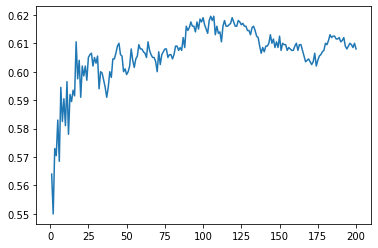

In [38]:
plt.plot(range(1,201), scores)
plt.show()

In [49]:
max_index = scores.index(max(scores)) + 1
print(max_index)

105


In [51]:
classifier = KNeighborsClassifier(n_neighbors = max_index)
classifier.fit(X_train, y_train)
classifier.score(X_valid, y_valid) * 100

61.95